## Getting Started: What's an "Experiment"? 

To me, an experiment means a test of some hypothesis. The hypothesis may be substantiated on proper scientific thought, or it may simply be a stray idea wandering from the mind of its creator. Experiments can end in success or failure, but one result remains constant: all experiments yield _experience_. 

By this definition, I believe that __the activity of dating can be regarded as an experiment__. A relationship can blossom or fail, but all parties involved will gain some knowledge from it regardless. 

For this assignment, __I will be inspecting and visualizing data from speed dating records in order to compare the correlation between certain partner statistics and matching success__ (source: https://www.kaggle.com/annavictoria/speed-dating-experiment).

## Imports

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as linreg
from scipy.stats import pearsonr

## Fetching Data

In [3]:
# this is the dataset itself. 
data = pd.read_csv("Speed_Dating_Data.csv", encoding='latin-1')
data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## Explaining the dataset

As you can tell by the sheer number of columns in the dataset, we are working with fairly complex data here. Fortunately, there is a document I downloaded from the data's online source that describes the dataset. __For convenience, I have pasted the descriptions for the columns that I will use in my visualization here__: 

* id: subject number within wave

* match: 1=yes, 0=no

* mn_sat: Median SAT score for the undergraduate institution where attended. Taken from Barron’s 25th Edition college profile book. Proxy for intelligence. (Isaac note: I am beginning to like this dataset less and less) 

* income: Median household income based on zipcode using the Census Bureau website: http://venus.census.gov/cdrom/lookup/CMD=LIST/DB=C90STF3B/LEV=ZIP. When there is no income it means that they are either from abroad or did not enter their zip code.

* age: (Isaac note: no description given) 



Personally, I am most interested in seeing __which features have the strongest correlation with finding a match__, be that a positive or negative correlation. In order to better visualize correlations, we can use Scikit-learn's linear regression to generate lines of best fit. Additionally, we can directly determine correlation strength using Scipy's Pearson correlation function. 

## Visualizations and Correlations

In [10]:
# first, simplify the dataset
data_interesting = data[["id", "gender", "undergra", "mn_sat", "income", "age", "samerace", "match"]]
data_interesting
# note that this data was most likely volunteer-supplied, so there is likely an issue
# with individuals with low income or low SAT not providing data. 

,id,gender,undergra,mn_sat,income,age,samerace,match
0,1.0,0,NaN,NaN,"69,487.00",21.0,0,0
1,1.0,0,NaN,NaN,"69,487.00",21.0,0,0
2,1.0,0,NaN,NaN,"69,487.00",21.0,1,1
3,1.0,0,NaN,NaN,"69,487.00",21.0,0,1
4,1.0,0,NaN,NaN,"69,487.00",21.0,0,1
...,...,...,...,...,...,...,...,...
8373,22.0,1,"Ecole Normale Suprieure, Paris",NaN,NaN,25.0,0,0
8374,22.0,1,"Ecole Normale Suprieure, Paris",NaN,NaN,25.0,0,0
8375,22.0,1,"Ecole Normale Suprieure, Paris",NaN,NaN,25.0,0,0
8376,22.0,1,"Ecole Normale Suprieure, Paris",NaN,NaN,25.0,0,0


### Age vs. Match Success

In [26]:
# set up linear regression
lr = linreg() # create regression object

# fit model
lr.fit(data_interesting[data_interesting["age"].notnull()]["age"].values.reshape(-1,1), 
                        data_interesting[data_interesting["age"].notnull()]["match"]) 

# predict for x-values
agevmatch_preds = lr.predict(data_interesting[data_interesting["age"].notnull()]["age"].values.reshape(-1,1)) 
agevmatch_preds

array([0.18395709, 0.18395709, 0.18395709, ..., 0.16938409, 0.16938409,
       0.16938409])

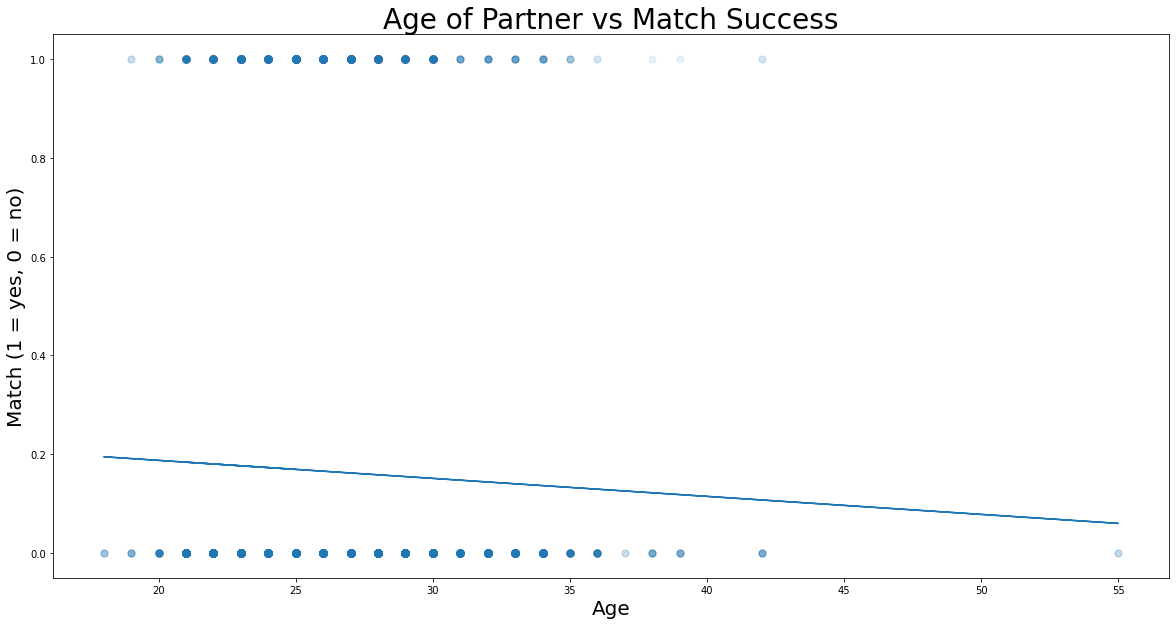

In [74]:
# plot 1: age v match
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Age", fontsize = 20)
plt.ylabel(ylabel="Match (1 = yes, 0 = no)", fontsize = 20)
plt.title(label="Age of Partner vs Match Success", fontsize = 28)

plt.scatter(x = data_interesting["age"], 
            y = data_interesting["match"],
            alpha = 0.05,
            s = 50)

plt.plot(data_interesting[data_interesting["age"].notnull()]["age"], agevmatch_preds)

plt.show()

In [31]:
# determine the correlation
pearsonr(data_interesting[data_interesting["age"].notnull()]["age"], 
         data_interesting[data_interesting["age"].notnull()]["match"])


(-0.03505514040313265, 0.0014182931569047795)

The first value, described in the Scipy documentation, is the important one for our purposes. It represents the Pearson correlation coefficient (covariance of x and y divided by (standard deviation (x) * standard deviation (y)), which tells us the strength and direction of the correlation. In this case, __the correlation between age and matching success is negative and very weak__. 

### SAT Score vs Match Success

Note that the SAT scores here are not the scores of the individual, but the median scores from the institution where an individual recieved their undergraduate degree. For this visualization (and all subsequent ones), I'll be re-using the code I used for the age v success step. 

In [64]:
# set up linear regression
lr = linreg() # create regression object

# fit model (I had to convert the SAT scores from string to float... sorry about the messy code)
lr.fit(data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])).values.reshape(-1,1),
                        data_interesting[data_interesting["mn_sat"].notnull()]["match"]) 

# predict for x-values
satvmatch_preds = lr.predict(data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])).values.reshape(-1,1)) 
satvmatch_preds

array([0.14462814, 0.14462814, 0.14462814, ..., 0.16024137, 0.16024137,
       0.16024137])

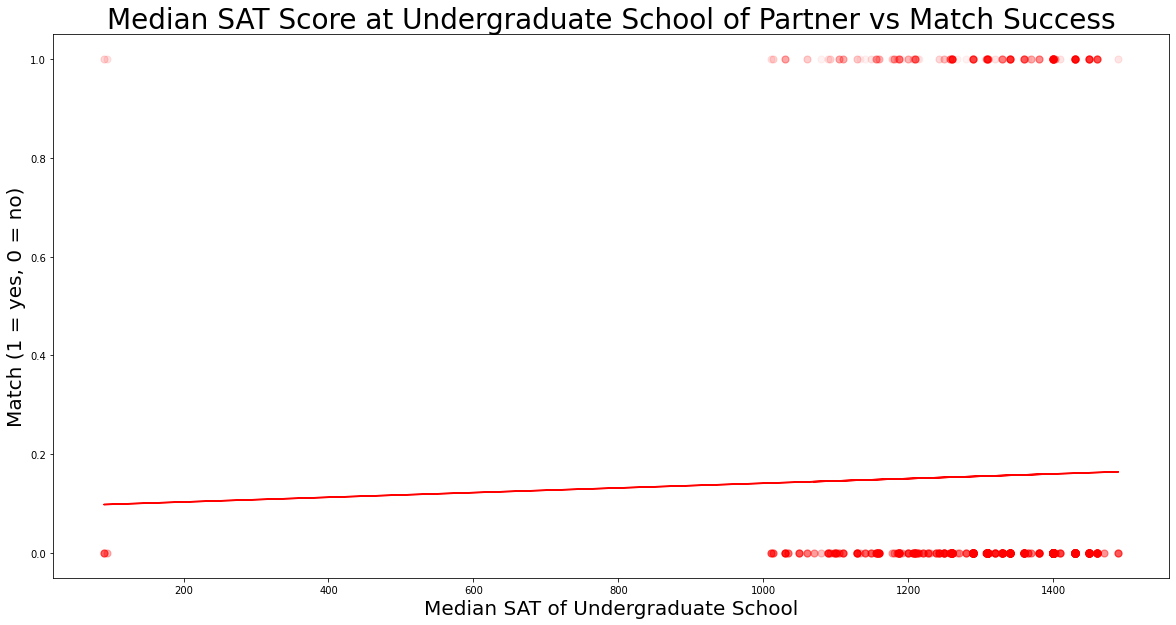

In [76]:
# plot 2: SAT v match
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Median SAT of Undergraduate School", fontsize = 20)
plt.ylabel(ylabel="Match (1 = yes, 0 = no)", fontsize = 20)
plt.title(label="Median SAT Score at Undergraduate School of Partner vs Match Success", fontsize = 28)

plt.scatter(x = data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])), 
            y = data_interesting[data_interesting["mn_sat"].notnull()]["match"],
            alpha = 0.05,
            s = 50,
            c = "red") # spice it up 

plt.plot(data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])), 
         satvmatch_preds,
         c = "red")

plt.show()

In [67]:
# determine the correlation
pearsonr(data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])), 
         data_interesting[data_interesting["mn_sat"].notnull()]["match"])

(0.021213122007576943, 0.23521727534770126)

Again, we see a weak correlation (indicated by the first value in the output above). However, this time, the correlation is positive. 

### Income vs Match

Note that "income" is not a measure of individual income, but the median household income of an individual's zip code. 

In [83]:
data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: x.replace(",", ""))

0       69487.00
1       69487.00
2       69487.00
3       69487.00
4       69487.00
          ...   
8351    55138.00
8352    55138.00
8353    55138.00
8354    55138.00
8355    55138.00
Name: income, Length: 4279, dtype: object

In [85]:
# set up linear regression
lr = linreg() # create regression object

# fit model (I had to convert the income scores from string to float. Again, sorry about the messy code)
lr.fit(data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))).values.reshape(-1,1),
                        data_interesting[data_interesting["income"].notnull()]["match"]) 

# predict for x-values
incvmatch_preds = lr.predict(data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))).values.reshape(-1,1)) 
incvmatch_preds

array([0.18629793, 0.18629793, 0.18629793, ..., 0.17795948, 0.17795948,
       0.17795948])

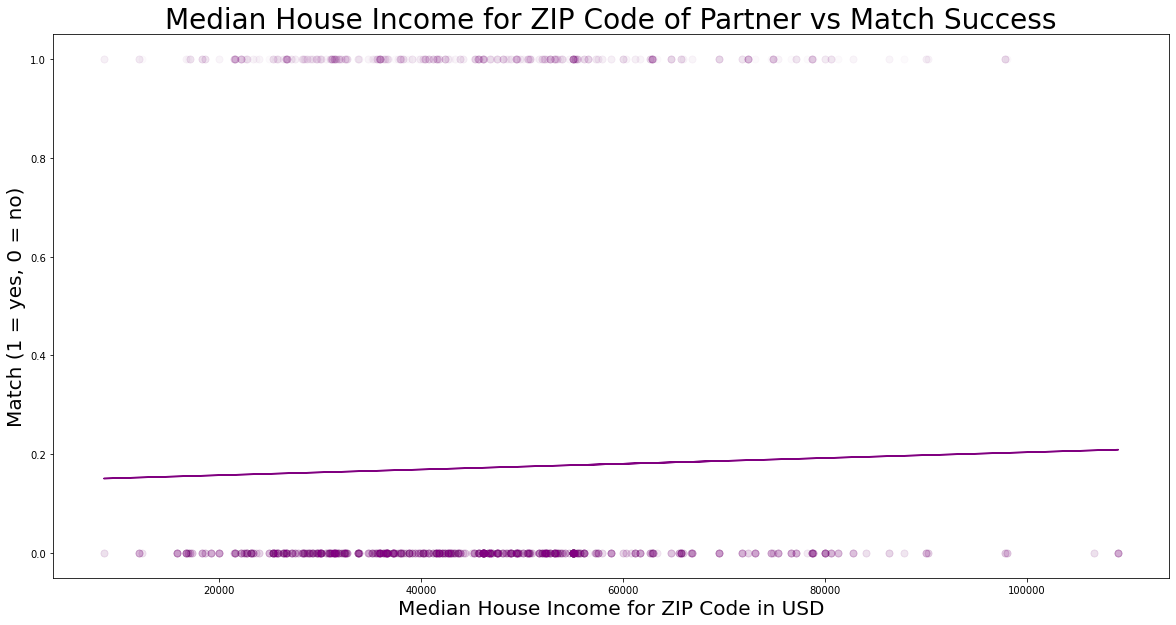

In [89]:
# plot 3: Income v match
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Median House Income for ZIP Code in USD", fontsize = 20)
plt.ylabel(ylabel="Match (1 = yes, 0 = no)", fontsize = 20)
plt.title(label="Median House Income for ZIP Code of Partner vs Match Success", fontsize = 28)

plt.scatter(x = data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))), 
            y = data_interesting[data_interesting["income"].notnull()]["match"],
            alpha = 0.02,
            s = 50,
            c = "purple") # spice it up 

plt.plot(data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))), 
         incvmatch_preds,
         c = "purple")

plt.show()

In [90]:
# determine the correlation
pearsonr(data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))), 
         data_interesting[data_interesting["income"].notnull()]["match"])

(0.02649315975386938, 0.08312711618715325)

Again, a weak, positive correlation. However, this correlation is a bit stronger than what we've seen in other plots. 

## Combination Plot

Using matplotlib, we can combine multiple graphs into a single visualization. For this step, I got help from https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html. 

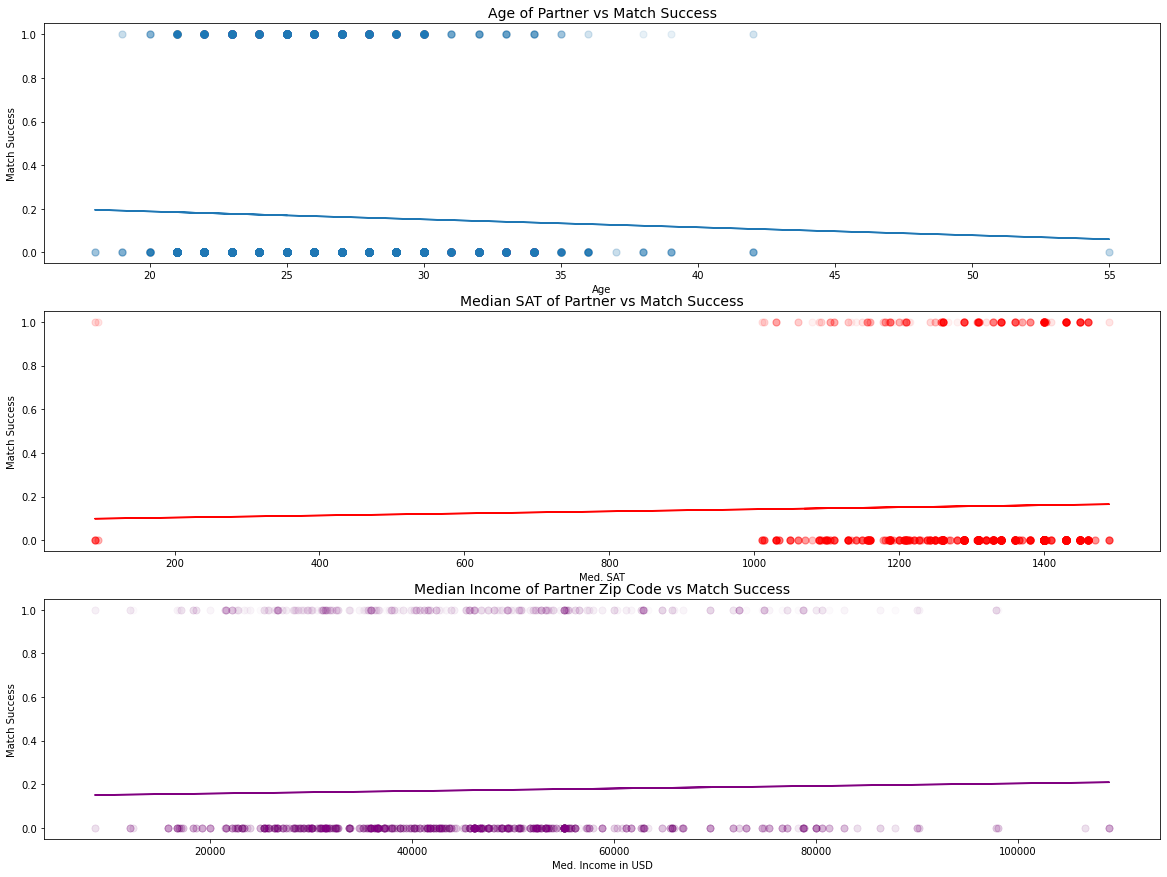

In [125]:
# plot
fig, axs = plt.subplots(3, sharey = True, figsize=(20,15))
                

# plot 1
axs[0].set(xlabel="Age", ylabel="Match Success")
axs[0].set_title(label="Age of Partner vs Match Success", fontsize = 14)

axs[0].scatter(x = data_interesting["age"], 
            y = data_interesting["match"],
            alpha = 0.05,
            s = 50)

axs[0].plot(data_interesting[data_interesting["age"].notnull()]["age"], agevmatch_preds)


# plot 2
axs[1].set(xlabel="Med. SAT", ylabel="Match Success")
axs[1].set_title(label="Median SAT of Partner vs Match Success", fontsize = 14)

axs[1].scatter(x = data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])), 
            y = data_interesting[data_interesting["mn_sat"].notnull()]["match"],
            alpha = 0.05,
            s = 50,
            c = "red") # spice it up 

axs[1].plot(data_interesting[data_interesting["mn_sat"].notnull()]["mn_sat"].apply(lambda x: float(x[0]+x[2:])), 
         satvmatch_preds,
         c = "red")

# plot 3
axs[2].set(xlabel="Med. Income in USD", ylabel="Match Success")
axs[2].set_title(label="Median Income of Partner Zip Code vs Match Success", fontsize = 14)

axs[2].scatter(x = data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))), 
            y = data_interesting[data_interesting["income"].notnull()]["match"],
            alpha = 0.02,
            s = 50,
            c = "purple") # spice it up 

axs[2].plot(data_interesting[data_interesting["income"].notnull()]["income"].apply(lambda x: float(x.replace(",", ""))), 
         incvmatch_preds,
         c = "purple")


plt.show()